In [1]:
pip install numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
print(os.getcwd())


C:\Users\RISHAVDEEP MAITY\Desktop\data_analytics\covid19_analytics


In [3]:
os.listdir()


['.ipynb_checkpoints',
 'covid19.ipynb',
 'worldometer_coronavirus_daily_data.csv',
 'worldometer_coronavirus_summary_data.csv']

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals - use Seaborn's built-in themes
sns.set_theme()

# Load datasets
daily_df = pd.read_csv("worldometer_coronavirus_daily_data.csv")
summary_df = pd.read_csv("worldometer_coronavirus_summary_data.csv")

# Preview
daily_df.head(), summary_df.head()


(        date      country  cumulative_total_cases  daily_new_cases  \
 0  2020-2-15  Afghanistan                     0.0              NaN   
 1  2020-2-16  Afghanistan                     0.0              NaN   
 2  2020-2-17  Afghanistan                     0.0              NaN   
 3  2020-2-18  Afghanistan                     0.0              NaN   
 4  2020-2-19  Afghanistan                     0.0              NaN   
 
    active_cases  cumulative_total_deaths  daily_new_deaths  
 0           0.0                      0.0               NaN  
 1           0.0                      0.0               NaN  
 2           0.0                      0.0               NaN  
 3           0.0                      0.0               NaN  
 4           0.0                      0.0               NaN  ,
        country continent  total_confirmed  total_deaths  total_recovered  \
 0  Afghanistan      Asia           179267        7690.0         162202.0   
 1      Albania    Europe           275574   

In [5]:
daily_df.info()
daily_df.isnull().sum()

summary_df.info()
summary_df.isnull().sum()

daily_df.duplicated().sum()
summary_df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184787 entries, 0 to 184786
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     184787 non-null  object 
 1   country                  184787 non-null  object 
 2   cumulative_total_cases   184787 non-null  float64
 3   daily_new_cases          174329 non-null  float64
 4   active_cases             166747 non-null  float64
 5   cumulative_total_deaths  178227 non-null  float64
 6   daily_new_deaths         157850 non-null  float64
dtypes: float64(5), object(2)
memory usage: 9.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         226 non-null    object 
 1   continent                       226 non-null    ob

0

In [6]:
daily_df.fillna(0, inplace=True)
summary_df.fillna(0, inplace=True)


In [7]:
daily_df['date'] = pd.to_datetime(daily_df['date'])


In [8]:
print(daily_df.columns)


Index(['date', 'country', 'cumulative_total_cases', 'daily_new_cases',
       'active_cases', 'cumulative_total_deaths', 'daily_new_deaths'],
      dtype='object')


In [9]:
print(daily_df.head(50))

         date      country  cumulative_total_cases  daily_new_cases  \
0  2020-02-15  Afghanistan                     0.0              0.0   
1  2020-02-16  Afghanistan                     0.0              0.0   
2  2020-02-17  Afghanistan                     0.0              0.0   
3  2020-02-18  Afghanistan                     0.0              0.0   
4  2020-02-19  Afghanistan                     0.0              0.0   
5  2020-02-20  Afghanistan                     0.0              0.0   
6  2020-02-21  Afghanistan                     0.0              0.0   
7  2020-02-22  Afghanistan                     0.0              0.0   
8  2020-02-23  Afghanistan                     0.0              0.0   
9  2020-02-24  Afghanistan                     1.0              0.0   
10 2020-02-25  Afghanistan                     1.0              0.0   
11 2020-02-26  Afghanistan                     1.0              0.0   
12 2020-02-27  Afghanistan                     1.0              0.0   
13 202

In [10]:

daily_df['date'] = pd.to_datetime(daily_df['date'])

daily_df['year'] = daily_df['date'].dt.year
daily_df['month'] = daily_df['date'].dt.month

daily_df['active_cases_recalc'] = (
    daily_df['cumulative_total_cases'] - daily_df['cumulative_total_deaths']
)

daily_df.head(50)


,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,year,month,active_cases_recalc
0,2020-02-15,Afghanistan,0.0,0.0,0.0,0.0,0.0,2020,2,0.0
1,2020-02-16,Afghanistan,0.0,0.0,0.0,0.0,0.0,2020,2,0.0
2,2020-02-17,Afghanistan,0.0,0.0,0.0,0.0,0.0,2020,2,0.0
3,2020-02-18,Afghanistan,0.0,0.0,0.0,0.0,0.0,2020,2,0.0
4,2020-02-19,Afghanistan,0.0,0.0,0.0,0.0,0.0,2020,2,0.0
5,2020-02-20,Afghanistan,0.0,0.0,0.0,0.0,0.0,2020,2,0.0
6,2020-02-21,Afghanistan,0.0,0.0,0.0,0.0,0.0,2020,2,0.0
7,2020-02-22,Afghanistan,0.0,0.0,0.0,0.0,0.0,2020,2,0.0
8,2020-02-23,Afghanistan,0.0,0.0,0.0,0.0,0.0,2020,2,0.0
9,2020-02-24,Afghanistan,1.0,0.0,1.0,0.0,0.0,2020,2,1.0


In [11]:
country_cases = (
    summary_df.groupby('country')['total_confirmed']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

country_cases

country
USA            84209473
India          43121599
Brazil         30682094
France         29160802
Germany        25780226
UK             22159805
Russia         18260293
South Korea    17782061
Italy          17057873
Turkey         15053168
Name: total_confirmed, dtype: int64

In [12]:
monthly_cases = daily_df.pivot_table(
    values="daily_new_cases",   # correct column name
    index="month",
    columns="year",
    aggfunc="sum"
)

monthly_cases


year,2020,2021,2022
month,,,
1,11220.0,19539707.0,89943641.0
2,75111.0,11118315.0,58081017.0
3,890544.0,14727740.0,49798629.0
4,2523871.0,22515970.0,24672239.0
5,3024953.0,19771464.0,7420325.0
6,4427456.0,11554882.0,NaN
7,7329076.0,15849321.0,NaN
8,8068103.0,20207849.0,NaN
9,8636958.0,16129606.0,NaN


In [13]:
summary_df.columns
summary_df['total_cases_per_1m_population'] = summary_df['total_confirmed'] / (summary_df['population'] / 1_000_000)
summary_df.head(50)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4419.728527,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95953.787416,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5864.599404,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983.482805,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,0.0,2852.920985,55.0,1499795.0,43136.0,34769277
5,Anguilla,North America,2984,9.0,2916.0,59.0,4.0,195646.472594,590.0,51382.0,3368870.0,15252
6,Antigua And Barbuda,North America,7721,137.0,7511.0,73.0,1.0,77645.591770,1378.0,18901.0,190076.0,99439
7,Argentina,South America,9101319,128729.0,8895999.0,76591.0,372.0,197991.745332,2800.0,35716069.0,776974.0,45968174
8,Armenia,Asia,422896,8623.0,412048.0,2225.0,0.0,142218.850280,2900.0,3068217.0,1031834.0,2973558
9,Aruba,North America,35693,213.0,35199.0,281.0,0.0,331688.504786,1979.0,177885.0,1653053.0,107610


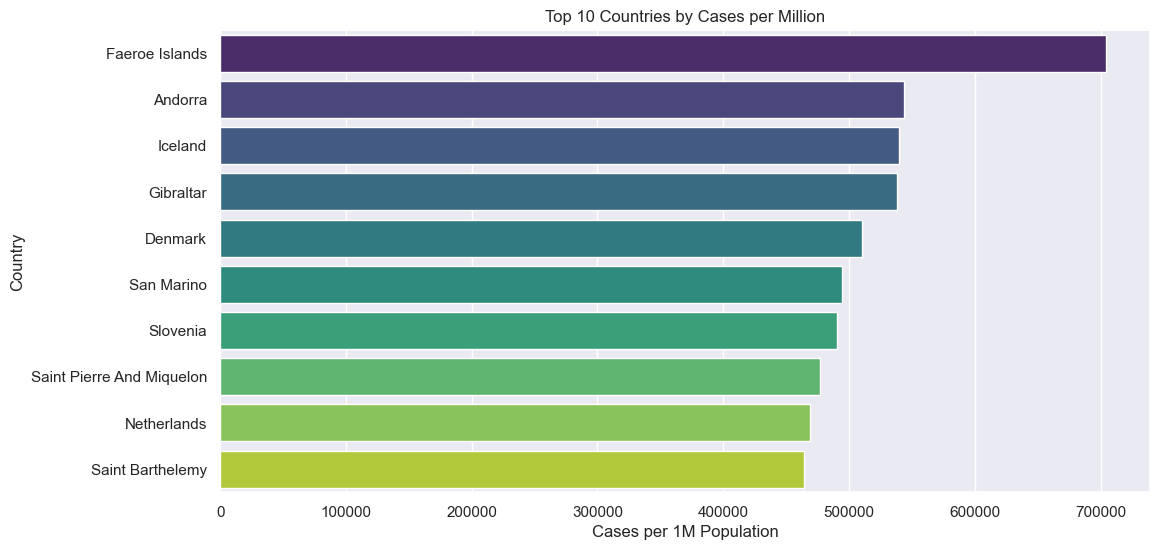

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 countries by cases per million
top_cases_per_million = summary_df.nlargest(10, 'total_cases_per_1m_population')

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_cases_per_million,
    x='total_cases_per_1m_population',
    y='country',
    hue='country',             # add hue
    palette="viridis",
    legend=False               # avoid duplicate legend
)

plt.title("Top 10 Countries by Cases per Million")
plt.xlabel("Cases per 1M Population")
plt.ylabel("Country")
plt.show()


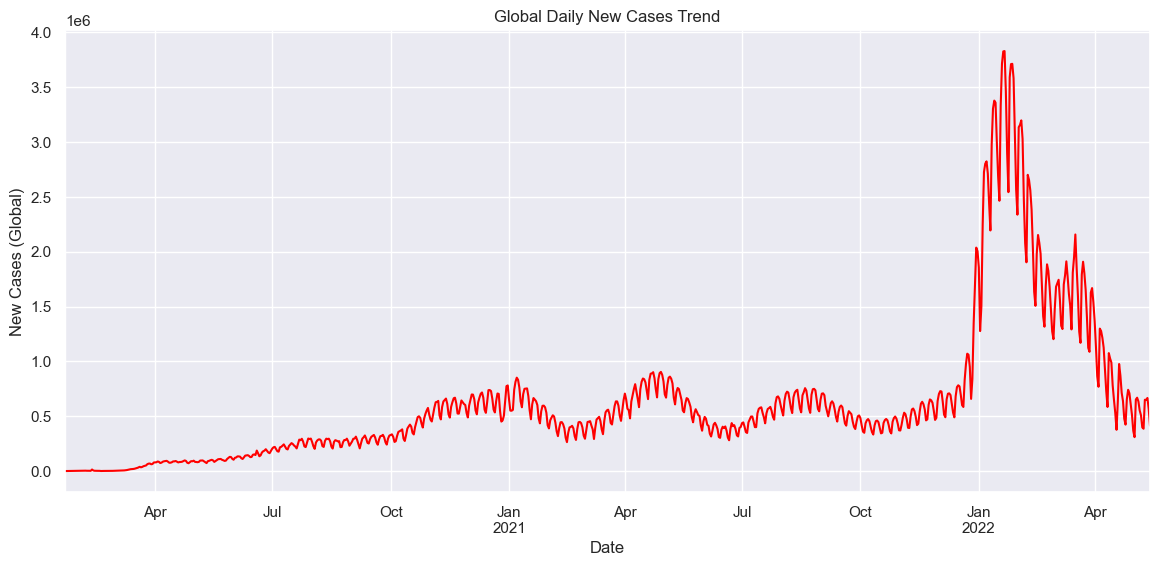

Peak Daily Cases: 3829248.0 on 2022-01-21 00:00:00


In [15]:
global_cases = daily_df.groupby("date")["daily_new_cases"].sum()

plt.figure(figsize=(14,6))
global_cases.plot(kind="line", color="red")
plt.title("Global Daily New Cases Trend")
plt.xlabel("Date")
plt.ylabel("New Cases (Global)")
plt.show()

print("Peak Daily Cases:", global_cases.max(), "on", global_cases.idxmax())


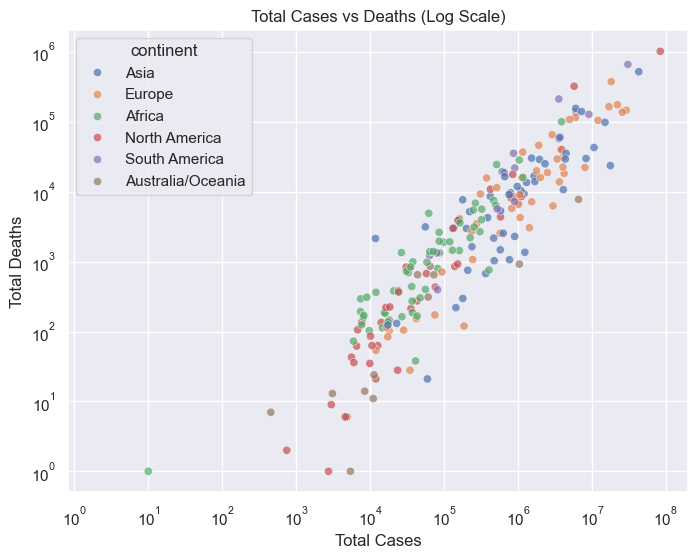

Correlation between cases and deaths: 0.9058114524600086


In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=summary_df, 
                x="total_confirmed", 
                y="total_deaths", 
                hue="continent", 
                alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.title("Total Cases vs Deaths (Log Scale)")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.show()

correlation = summary_df["total_confirmed"].corr(summary_df["total_deaths"])
print("Correlation between cases and deaths:", correlation)


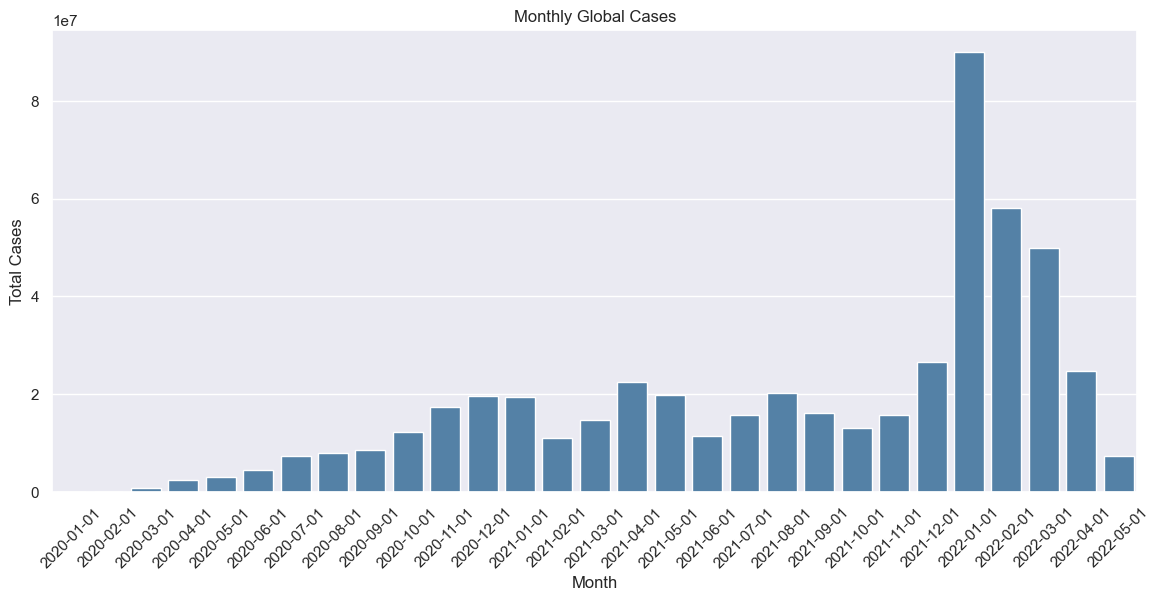

In [17]:
monthly_cases = daily_df.groupby(["year","month"])["daily_new_cases"].sum().reset_index()
monthly_cases["date"] = pd.to_datetime(monthly_cases["year"].astype(str) + "-" + monthly_cases["month"].astype(str) + "-01")

plt.figure(figsize=(14,6))
sns.barplot(data=monthly_cases, x="date", y="daily_new_cases", color="steelblue")
plt.xticks(rotation=45)
plt.title("Monthly Global Cases")
plt.xlabel("Month")
plt.ylabel("Total Cases")
plt.show()


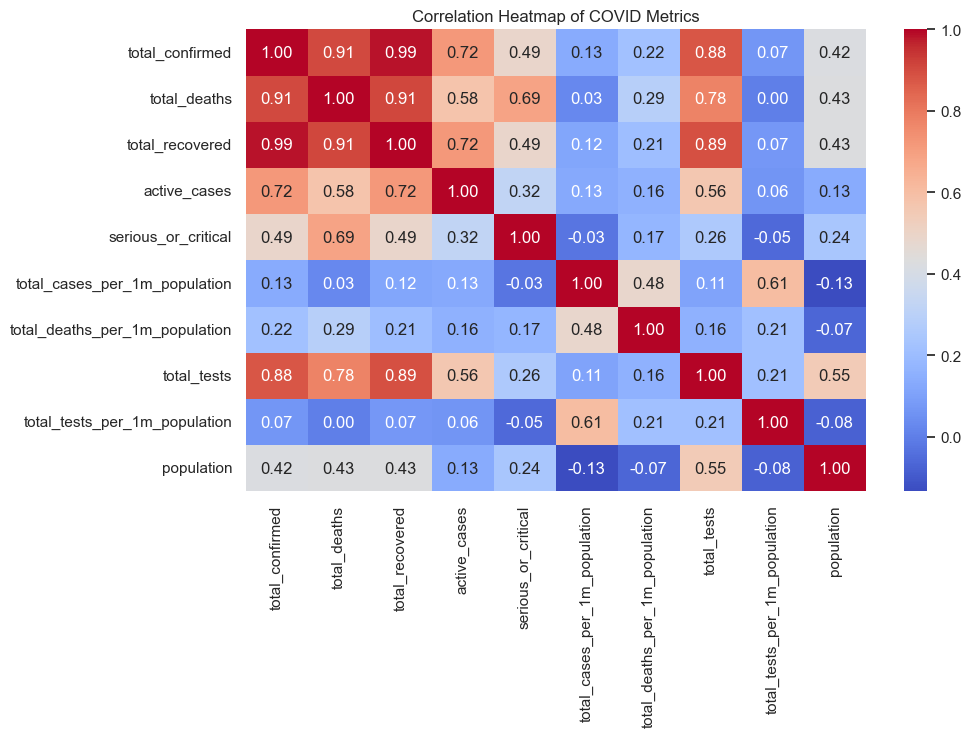

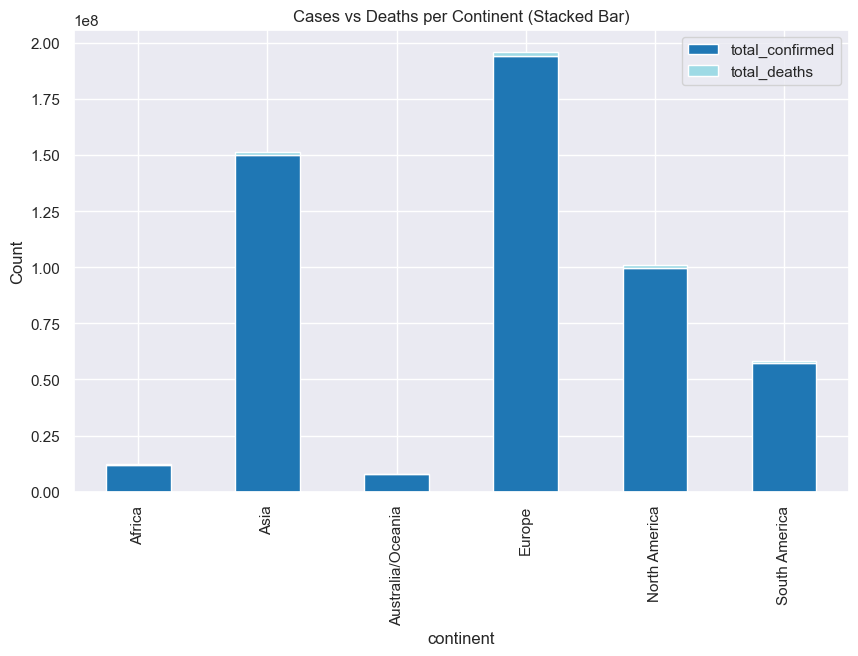

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(summary_df.drop(columns=["country","continent"]).corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of COVID Metrics")
plt.show()

continent_stats = summary_df.groupby("continent")[["total_confirmed","total_deaths"]].sum().reset_index()

continent_stats.set_index("continent")[["total_confirmed","total_deaths"]].plot(
    kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title("Cases vs Deaths per Continent (Stacked Bar)")
plt.ylabel("Count")
plt.show()
